In [11]:
# Plot decision tree boundries - inspired by: https://github.com/ageron/handson-ml3
def plot_decision_boundary(clf, X, y, axes=None, legend=False, plot_training=True):
    if axes is None:
        x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        axes = [x0_min, x0_max, x1_min, x1_max]

    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)

    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="class_0")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="class_1")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="class_2")
        plt.axis(axes)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

    if legend:
        plt.legend(loc="lower right", fontsize=14)

In [ ]:
#load_wine

In [12]:
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
from sklearn import tree
import numpy as np

In [13]:
from sklearn.datasets import load_wine

wine = load_wine()
X = wine.data[:, :2] 
y = wine.target
list(wine.target_names)

['class_0', 'class_1', 'class_2']

In [14]:
X.shape, y.shape

((178, 2), (178,))

In [15]:
# number of classes
np.unique(y).shape

(3,)

In [16]:
tree_clf = tree.DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

[Text(0.5, 0.8333333333333334, 'x[0] <= 12.78\ngini = 0.658\nsamples = 178\nvalue = [59.0, 71.0, 48.0]'),
 Text(0.25, 0.5, 'x[1] <= 2.96\ngini = 0.256\nsamples = 73\nvalue = [0, 62, 11]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.128\nsamples = 58\nvalue = [0, 54, 4]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.498\nsamples = 15\nvalue = [0, 8, 7]'),
 Text(0.75, 0.5, 'x[1] <= 2.235\ngini = 0.553\nsamples = 105\nvalue = [59, 9, 37]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.311\nsamples = 61\nvalue = [50, 7, 4]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.394\nsamples = 44\nvalue = [9, 2, 33]')]

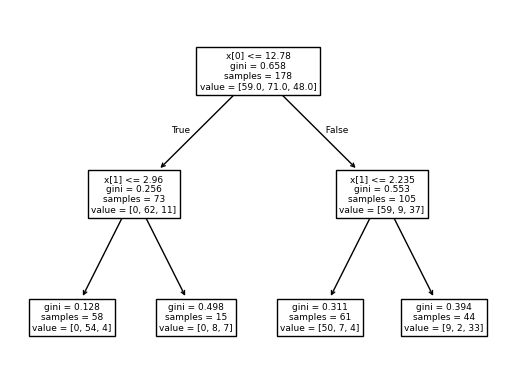

In [17]:
tree.plot_tree(tree_clf)

Text(13, 1.8, 'Depth=1')

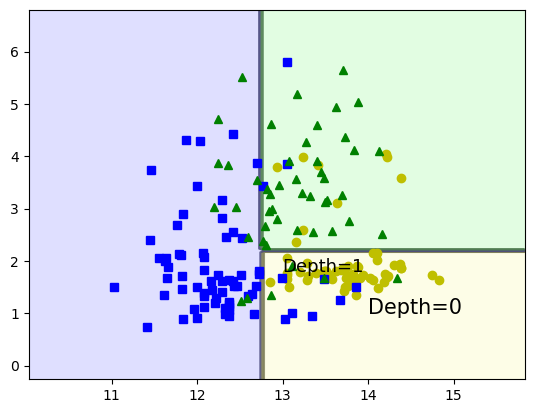

In [25]:
plot_decision_boundary(tree_clf, X, y)
plt.text(14, 1.0, "Depth=0", fontsize=15)
plt.text(13, 1.80, "Depth=1", fontsize=13)

In [26]:
tree_clf.get_depth()

2

In [27]:
for name, score in zip(["length", "wedith"], tree_clf.feature_importances_):
    print(name, score)

length 0.6130197584061775
wedith 0.3869802415938225


In [ ]:
#overfitting

In [28]:
from sklearn.datasets import make_moons

In [36]:
Xm, ym = make_moons(n_samples=300, noise=0.25, random_state=53)

In [37]:
deep_tree_clf1 = tree.DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = tree.DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

DecisionTreeClassifier(min_samples_leaf=4, random_state=42)

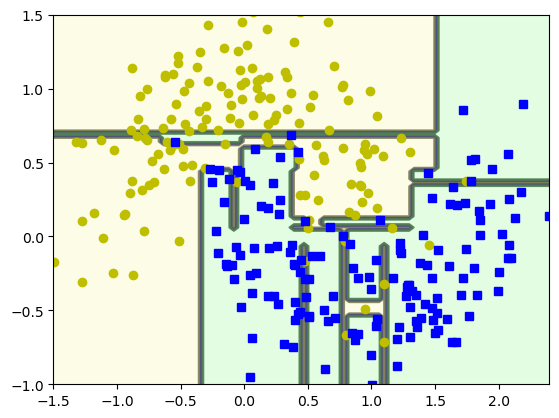

In [38]:
# plot unrestrcited tree
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5])

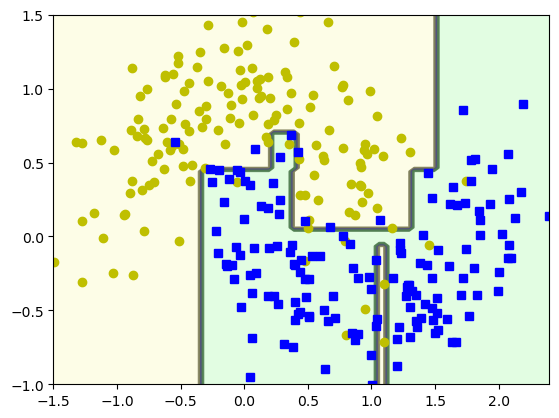

In [39]:
# restrcited (controled) tree
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5])

In [40]:
deep_tree_clf1.get_depth(), deep_tree_clf2.get_depth()

(12, 11)

[Text(0.6213235294117647, 0.9615384615384616, 'x[1] <= 0.461\ngini = 0.5\nsamples = 300\nvalue = [150, 150]'),
 Text(0.3014705882352941, 0.8846153846153846, 'x[0] <= -0.347\ngini = 0.361\nsamples = 182\nvalue = [43, 139]'),
 Text(0.46139705882352944, 0.9230769230769231, 'True  '),
 Text(0.27205882352941174, 0.8076923076923077, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.33088235294117646, 0.8076923076923077, 'x[1] <= 0.048\ngini = 0.251\nsamples = 163\nvalue = [24, 139]'),
 Text(0.17647058823529413, 0.7307692307692307, 'x[1] <= -0.064\ngini = 0.116\nsamples = 113\nvalue = [7, 106]'),
 Text(0.11764705882352941, 0.6538461538461539, 'x[0] <= 1.134\ngini = 0.093\nsamples = 102\nvalue = [5, 97]'),
 Text(0.08823529411764706, 0.5769230769230769, 'x[0] <= 1.071\ngini = 0.153\nsamples = 60\nvalue = [5, 55]'),
 Text(0.058823529411764705, 0.5, 'x[0] <= 0.463\ngini = 0.098\nsamples = 58\nvalue = [3, 55]'),
 Text(0.029411764705882353, 0.4230769230769231, 'gini = 0.0\nsamples = 30\nvalue =

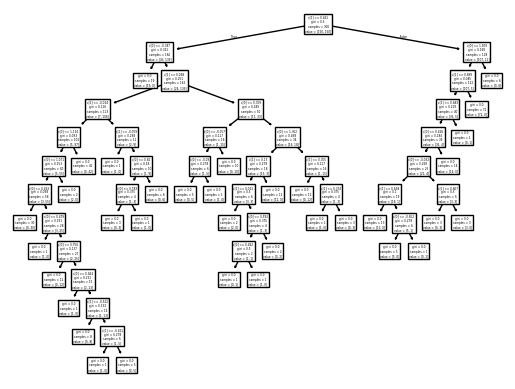

In [41]:
tree.plot_tree(deep_tree_clf1)